<a href="https://colab.research.google.com/github/supreetsandhu/Education-Inequality/blob/main/DATA_3320_Education_Inequality_Data_Preparation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This project will look at differenet socioeconomic factors and locations of different schools. We will be using two different datasets to anaylsis how the peformance of different schools and how students at the school peform and how that relates to various socioeconomic factors. here are two data sources for this project. The first is EdGap_data.xlxs which was obtained from the Github repository for DATA 3320 in the education folder (https://github.com/brian-fischer/DATA-3320/tree/main/education). This excel document contains information about schools, SAT Scores, marriage status and the income statu. The other is a CSV that was obtained from this dropbox: https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0. The data in this CSV file contains information about different schools, location of those schools and their peformance in school such as if they recieved offers for different schools. One data set is from the EdGap data set from EdGap.org. This data set includes data about ACT or SAT scores for schools and several socioeconomic characteristics, it is also from the year 2016. The other data set is information such as location and other factors about the school from the National Center for Education Statistic.Provide a brief introduction to the purpose of this notebook.

## Import libraries

We will import the libaries needed for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The data

This project utilizes two data sets. The primary data set is the EdGap data set from [EdGap.org](https://www.edgap.org/#5/37.875/-96.987). This data set from 2016 includes information about average ACT or SAT scores for schools and several socioeconomic characteristics of the school district. The secondary data set is basic information about each school from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp).





### EdGap data

All socioeconomic data (household income, unemployment, adult educational attainment, and family structure) are from the Census Bureau's American Community Survey. 

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) report that ACT and SAT score data is from each state's department of education or some other public data release. The nature of the other public data release is not known.

The quality of the census data and the department of education data can be assumed to be reasonably high. 

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) do not indicate that they processed the data in any way. The data were assembled by the [EdGap.org](https://www.edgap.org/#5/37.875/-96.987) team, so there is always the possibility for human error. Given the public nature of the data, we would be able to consult the original data sources to check the quality of the data if we had any questions.

### School information data

The school information data is from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp). This data set consists of basic identifying information about schools and can be assumed to be of reasonably high quality. As for the EdGap.org data, the school information data is public, so we would be able to consult the original data sources to check the quality of the data if we had any questions.


## Load the data

We will load the EdGap data set.

In [2]:
edgap = pd.read_excel('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/education/EdGap_data.xlsx')

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


We will load the school information data.

In [3]:
#!wget https://www.dropbox.com/s/dz2dqbvwctsde6f/ccd_sch_029_1617_w_1a_11212017.csv?dl=0 
!wget https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0

--2023-04-23 15:40:27--  https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv [following]
--2023-04-23 15:40:27--  https://www.dropbox.com/s/raw/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc80e402456a37776f93aeb0440d.dl.dropboxusercontent.com/cd/0/inline/B6tebZjzcCpFeJoDxWNXztUzXluTgLpQ4Dbsck8BS99CTVVQWLPze_eoross9zN-ZZscv2N9eQnKzInwhQqlAHndLeaea3A1ILs1NPKnCmX4gjzh_X4Iz-LBUINEVspHZWCohOrNQ8P6WY9ygFgUuWbuxKhXhXYVRk7ylLbAOms75w/file# [following]
--2023-04-23 15:40:28--  https://uc80e402456a37776f93aeb0440d.dl.dropboxusercontent.com/cd/0/inline/B6tebZ

In [4]:
school_info = pd.read_csv('ccd_sch_029_1617_w_1a_11212017.csv?dl=0', encoding= 'unicode_escape')

<ipython-input-4-54e0747c4ccf>:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_info = pd.read_csv('ccd_sch_029_1617_w_1a_11212017.csv?dl=0', encoding= 'unicode_escape')


## Explore the contents of the data sets

First we will examine the education data set. This data set includes information about socioecnomic factors for different schools.

In [5]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


We will now look at the school_info data set. This is a dataset that inclides information about the school such as location and the level of the school (eg. high school)

In [6]:
school_info.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


We will use the .info() to explore the types of data. 

In [7]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


we can tell that there are some missing observations because the count of values are different for each one, but not many. Note that this does not address school data that is missing from the data set.

We will now check to see if there are any missing values for the school_info data set.

In [8]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

This data set is much bigger than the EdGap set, so the EdGap does not include all the same schools that the school_info data set has.

There are many null values in the school information data set, however for our anaylsis we do not need all the columns in the school_info data set.

## Convert data types, if necessary

The end goal is to combine the two data sets. So we will want to convert any data to be the same type. The NCESSCH  value in both data sets are of different types. So we will cast them to be the same value type.

We will cast the `NCESSCH` column in the `school_info` DataFrame as an `int64`. We first need to drop rows where `NCESSCH` is a `NaN` value. 

We will drop where the shool_info NCESSCH value is a NaN.

In [9]:
school_info = school_info[school_info['NCESSCH'].isna() == False]

we will cast the type of NCESSCH to be a type of int64 in the school_info data set.

In [10]:
school_info['NCESSCH'] = school_info['NCESSCH'].astype('int64')

## Are the data suitable for answering the question?

We are interested in whether there is a relationship between the ACT score and the socioeconomic variables. We can make scatter plots to get a sense for the data. We are wanting to see if there is a correlation between these factors so that the data can answer our questions.

We will make two plots with socioeconomic factor and the average act. The first plot will be a scatterplot between the rate of unenmployment and the average act score.

<Axes: xlabel='average_act', ylabel='rate_unemployment'>

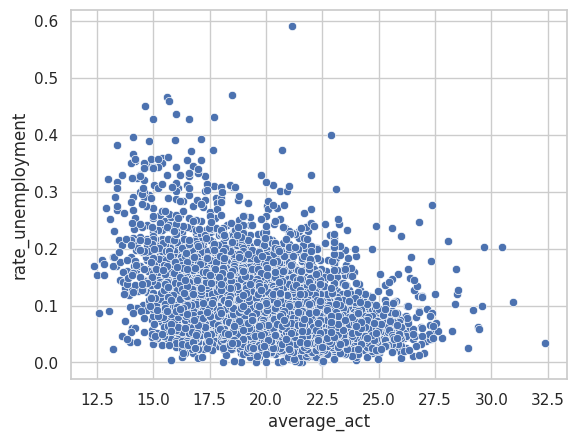

In [59]:
sns.scatterplot(data = df, x ="average_act", y = "rate_unemployment")

We can tell that there is a correlation between the two factors. This graph also tells us that there are some outliers that we are going to have to deal with.


We will make a scatterplot between the average act and the median income, this will help us determine if the data is sutiable for answering our question of if the data is suitable to use to see the connectin between the act score and socioeconmic factors.

<Axes: xlabel='average_act', ylabel='median_income'>

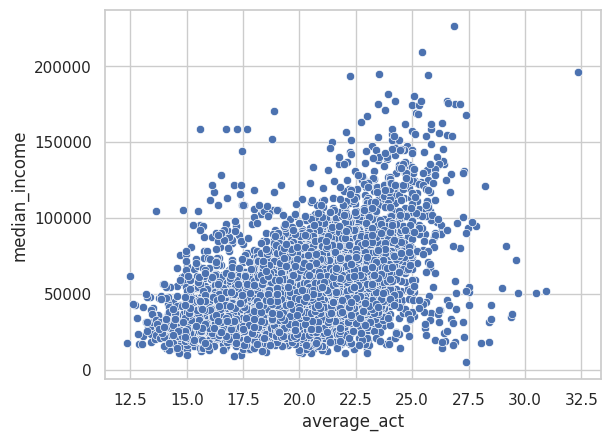

In [58]:
sns.scatterplot(data = df, x ="average_act", y = "median_income")

There  is a correlation between the median income and the average act. There appears to be a relationship between the socioeconomic variables and the average ACT score. We can also see some out-of-range ACT values that will need to be dealt with.

## Select relevant subsets of the data

We will only select the data that we need. The school information data set contains a lot of information. We only need the year, school identity, location, and school type information.

So we are going to keep these columns `SCHOOL_YEAR`, `NCESSCH`, `MSTATE`, `MZIP`, `SCH_TYPE_TEXT`, `LEVEL`

In [12]:
school_info = school_info[['SCHOOL_YEAR', 'NCESSCH', 'MSTATE', 'MZIP', 'SCH_TYPE_TEXT', 'LEVEL']]

In [13]:
school_info.head()

,SCHOOL_YEAR,NCESSCH,MSTATE,MZIP,SCH_TYPE_TEXT,LEVEL
0,2016-2017,10000200277,AL,35220,Alternative School,High
1,2016-2017,10000201667,AL,36057,Alternative School,High
2,2016-2017,10000201670,AL,36057,Alternative School,High
3,2016-2017,10000201705,AL,36057,Alternative School,High
4,2016-2017,10000201706,AL,35206,Alternative School,High


The school_info now only has the data that we need.

## Rename columns

We are going to rename the columns of data so that it is easier for us to understand and work with.

In [14]:
edgap = edgap.rename(columns={"NCESSCH School ID":"id", 
              "CT Pct Adults with College Degree":"percent_college",        
              "CT Unemployment Rate":"rate_unemployment", 
              "CT Pct Childre In Married Couple Family":"percent_married",
              "CT Median Household Income":"median_income",
              "School ACT average (or equivalent if SAT score)":"average_act",
              "School Pct Free and Reduced Lunch":"percent_lunch"})

In [15]:
school_info = school_info.rename(columns={'SCHOOL_YEAR':'year', 
                                          'NCESSCH':'id', 
                                          'MSTATE':'state',
                                          'MZIP':'zip_code',
                                          'SCH_TYPE_TEXT':'school_type',
                                          'LEVEL':'school_level'})

## Join data frames 

We will join the two data sets on their id.

In [18]:
df = edgap.merge(school_info, how = 'left', on='id')

The data sets are now combined into one data set called df.

## Quality Control: Check for out-of-range values

We will want to check what the max and min values are for the dataset and replace any values that may seem out of bounds.

We will check the min and max for each of the columns in dataset to check if there are any out of bounds data.

In [22]:
df.agg(['min', 'max']).round(2)

<ipython-input-22-39a2038683d4>:1: FutureWarning: ['year', 'state', 'zip_code', 'school_type', 'school_level'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['min', 'max']).round(2)


,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
min,100001600143,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,560583000335,0.59,1.00,1.0,226181.0,32.36,1.00


This shows that the average act and percent lunch have negatuve values that are not possible, we will need to remove those out of bounds variables.

We are going to set the out-of-range values to `NaN`.

In [24]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [25]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

We are going to do a quality control check on the school_ type data set and ensure that the data we can work with.

In [26]:
df['school_type'].value_counts()

Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: school_type, dtype: int64

In [27]:
df['school_level'].value_counts()

High            7230
Other            631
Not reported      35
Elementary         2
Name: school_level, dtype: int64

We now want to keep only the high schools and get rid of any value that is not a high school.

In [28]:
df = df.loc[df['school_level'] == 'High']

## Identify missing values

We will check to see how many values are missing.

In [29]:
df.isna().sum()

id                    0
rate_unemployment    12
percent_college      11
percent_married      20
median_income        16
average_act           3
percent_lunch        20
year                  0
state                 0
zip_code              0
school_type           0
school_level          0
dtype: int64

We will now check to see what the percent of each value is missing.

In [30]:
df.isna().mean().round(4)*100

id                   0.00
rate_unemployment    0.17
percent_college      0.15
percent_married      0.28
median_income        0.22
average_act          0.04
percent_lunch        0.28
year                 0.00
state                0.00
zip_code             0.00
school_type          0.00
school_level         0.00
dtype: float64

This shows that there are some missing values for the socioeconomic varaibles. However, many of the schools that are missing, it is only the subset of the variables and not the entire subset. We will not drop those rows that have NaN, because then it will become difficult to peform an anaylsis and draw meaningful conclusions. The average ACT score will be dropped because its missing.

We will impute the remaining missing values after splitting the data into training and testing sets for model evaluation.

In [31]:
df = df.loc[df['average_act'].isna() == False]

## Train test split

#### Get input and output variables.

##### $\rightarrow$ We need to determine what variables will be the input and output baraibles. So we will define the matrix of predictor variables `X` to be all columns except `id` and `average_act` and define the output variable `y` to be `average_act`.

In [34]:
X = df[df.columns.difference(['id','average_act'])]
y = df['average_act']

#### Train and test splits

We will want to find a way to predict the average _act. We will use the test set approach to compare models predicting `average_act`. We will use our single dataset of DF to determine a way of predicting the average_act variable.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/ML_dataset_training_validation_test_sets.png/800px-ML_dataset_training_validation_test_sets.png)

##### $\rightarrow$ we will be partioning the data to use to predict the average_act varaible, we are going ot split the data into training and testing sets. we will be keeping 20% of the data for the test set.  We will use a random function to decide what data to put into the 20%.

In [37]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

##### $\rightarrow$ we are going to do a quality check by checking that the training and testing input variables have similar means and standard deviations. This will tell us if we were able to divide up the data into the 20% correctly without a bias.

In [39]:
X_train.agg(['mean','std']).round(2)
#X_train.describe()

<ipython-input-39-f4b4e74f3eba>:1: FutureWarning: ['school_level', 'school_type', 'state', 'year', 'zip_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  X_train.agg(['mean','std']).round(2)


,median_income,percent_college,percent_lunch,percent_married,rate_unemployment
mean,53170.26,0.57,0.41,0.64,0.10
std,24827.94,0.17,0.23,0.19,0.06


In [40]:
X_test.agg(['mean','std']).round(2)

<ipython-input-40-247411c871de>:1: FutureWarning: ['school_level', 'school_type', 'state', 'year', 'zip_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  X_test.agg(['mean','std']).round(2)


,median_income,percent_college,percent_lunch,percent_married,rate_unemployment
mean,51179.23,0.57,0.42,0.63,0.10
std,22358.47,0.16,0.24,0.19,0.06


The mean and std should be very similar with both sets of data.There could be a small difference but overall we are looking at the mean and standard deviation for simplicity.

#### Imputation

We are going to define an imputer. Here we will use the iterative imputer.

In [41]:

imputer = IterativeImputer()

We are goin to fit the imputer for the training data only.

In [42]:
X_train.head()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code
3663,41793.0,0.602419,0.542056,0.574034,0.111111,High,Regular School,NJ,2016-2017,7306
1689,38173.0,0.469225,0.339655,0.711429,0.135246,High,Regular School,IN,2016-2017,47567
5852,39635.0,0.567361,0.270175,0.694514,0.083419,High,Regular School,PA,2016-2017,15853
3288,40978.0,0.467614,0.315556,0.766901,0.062531,High,Regular School,MO,2016-2017,64644
378,36875.0,0.604470,0.548410,0.803435,0.071429,High,Regular School,FL,2016-2017,34669


In [43]:
imputer.fit(X_train.loc[:,'median_income':'rate_unemployment'])

IterativeImputer()

We will now impute the missing data into the data set.

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 3663 to 5736
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_income      5766 non-null   float64
 1   percent_college    5770 non-null   float64
 2   percent_lunch      5764 non-null   float64
 3   percent_married    5763 non-null   float64
 4   rate_unemployment  5769 non-null   float64
 5   school_level       5781 non-null   object 
 6   school_type        5781 non-null   object 
 7   state              5781 non-null   object 
 8   year               5781 non-null   object 
 9   zip_code           5781 non-null   object 
dtypes: float64(5), object(5)
memory usage: 496.8+ KB


In [45]:
X_train.loc[:, 'median_income':'rate_unemployment'] = imputer.transform(X_train.loc[:,'median_income':'rate_unemployment'])

We will now ensure that there are no more missing values in the training set.

In [46]:
X_train.isna().sum()

median_income        0
percent_college      0
percent_lunch        0
percent_married      0
rate_unemployment    0
school_level         0
school_type          0
state                0
year                 0
zip_code             0
dtype: int64

We will now check for the missng values in the test data.

In [47]:
X_test.isna().sum()

median_income        1
percent_college      0
percent_lunch        3
percent_married      2
rate_unemployment    0
school_level         0
school_type          0
state                0
year                 0
zip_code             0
dtype: int64

For all of the missing values, we will use the imputer to replace the missing values.

In [48]:
X_test.loc[:,'median_income':'rate_unemployment'] = imputer.transform(X_test.loc[:,'median_income':'rate_unemployment'])

We will now do a quality check, to make sure there are no more missing values.

In [49]:
X_test.isna().sum()

median_income        0
percent_college      0
percent_lunch        0
percent_married      0
rate_unemployment    0
school_level         0
school_type          0
state                0
year                 0
zip_code             0
dtype: int64

We will join the train x and y data sets into one dataset. 

In [50]:
df_train = X_train.join(y_train)

In [51]:
df_train.head()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code,average_act
3663,41793.0,0.602419,0.542056,0.574034,0.111111,High,Regular School,NJ,2016-2017,7306,16.538462
1689,38173.0,0.469225,0.339655,0.711429,0.135246,High,Regular School,IN,2016-2017,47567,20.367521
5852,39635.0,0.567361,0.270175,0.694514,0.083419,High,Regular School,PA,2016-2017,15853,20.347985
3288,40978.0,0.467614,0.315556,0.766901,0.062531,High,Regular School,MO,2016-2017,64644,21.600000
378,36875.0,0.604470,0.548410,0.803435,0.071429,High,Regular School,FL,2016-2017,34669,21.056166


The train data is now combined into one dataset.

We will do the same join for the test data.

In [52]:
df_test = X_test.join(y_test)

In [53]:
df_test

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code,average_act
2804,52833.0,0.564717,0.226481,0.823245,0.100518,High,Regular School,MI,2016-2017,49112,21.000000
4162,62411.0,0.537197,0.677895,0.313253,0.095582,High,Regular School,NY,2016-2017,11413,16.245421
5411,63938.0,0.781818,0.561431,0.523810,0.096433,High,Regular School,PA,2016-2017,15222,18.345543
4171,25625.0,0.361014,0.625239,0.317358,0.168471,High,Regular School,NY,2016-2017,11103,18.663004
1950,46350.0,0.602669,0.358377,0.641444,0.089737,High,Regular School,KY,2016-2017,42025,20.000000
...,...,...,...,...,...,...,...,...,...,...,...
4882,33879.0,0.518481,0.784543,0.230473,0.158721,High,Regular School,OH,2016-2017,44870,20.000000
7441,46136.0,0.673419,0.269076,0.614195,0.058028,High,Regular School,WA,2016-2017,98506,23.156288
1631,77351.0,0.740656,0.204893,0.786031,0.036417,High,Regular School,IN,2016-2017,46069,20.885226
7715,37155.0,0.527434,0.434183,0.515067,0.177820,High,Regular School,WI,2016-2017,53144,20.500000


The df_test is now joined together with the x and y variables.

## Create relevant derived variables as new columns

There are no derived variables that are needed as new columns to peform further anaylsis.

## Export the clean .csv files

We will export a clean CVS file.

In [55]:
from google.colab import files

df.to_csv('clean_education_inequality_data_prep.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_education_inequality_data_prep.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>